In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Задание 1

In [364]:
data1 = pd.read_csv('task_1.csv', delimiter = ';')
Y = data1['Y']
X1 = data1['X1']
X2 = data1['X2']
X3 = data1['X3']
X4 = data1['X4']

In [365]:
def regression(Y, X):
    X = sm.add_constant(X)  
    model = sm.OLS(Y, X).fit()
    return model

Для построения моделей будем пользоваться следующими математическими выводами (на примере функции спроса):
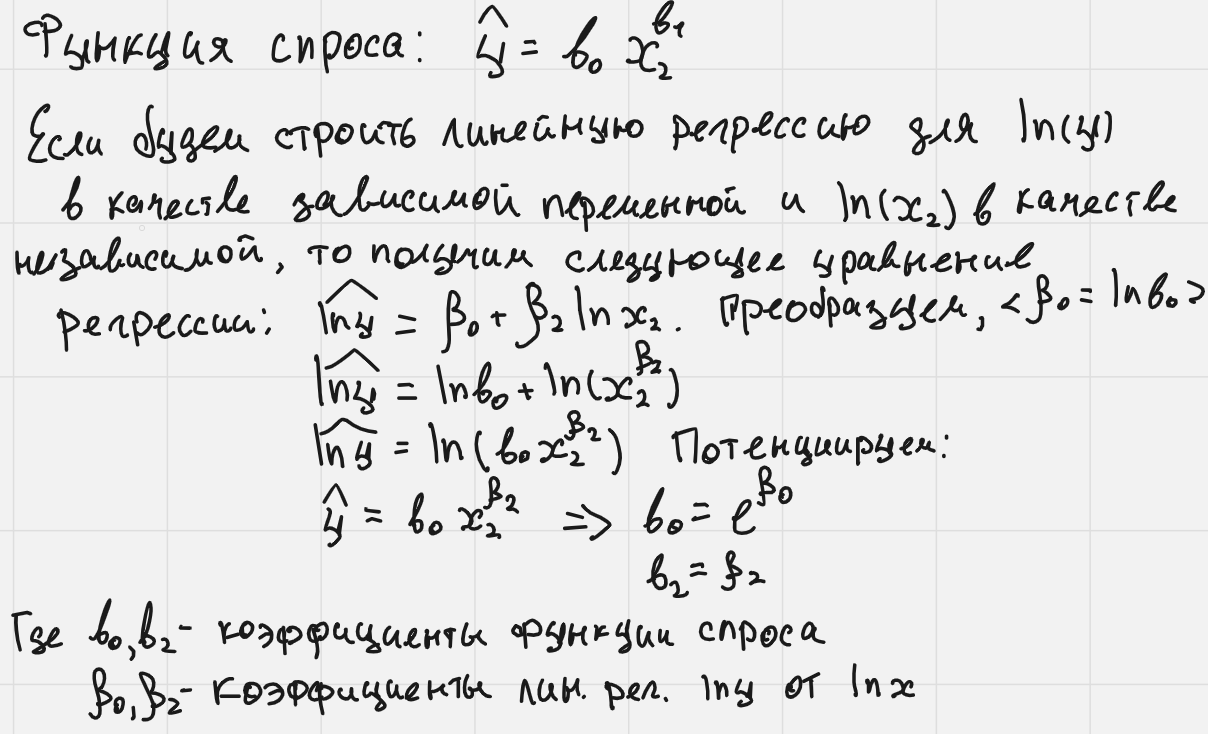
Для остальных моделей преобразования коэффициентов уравнения соответствующей линейной регрессии к коэффициентам нужной функции аналогичны.

In [366]:
model1 = regression(np.log(Y), np.log(X2))
print(f'Функция спроса: y = {np.exp(model1.params[0]):.3f} * X2^{model1.params[1]:.3f}')

Функция спроса: y = 4.844 * X2^0.553


Text(0.5, 0, 'Стоимость одного фунта цыплят')

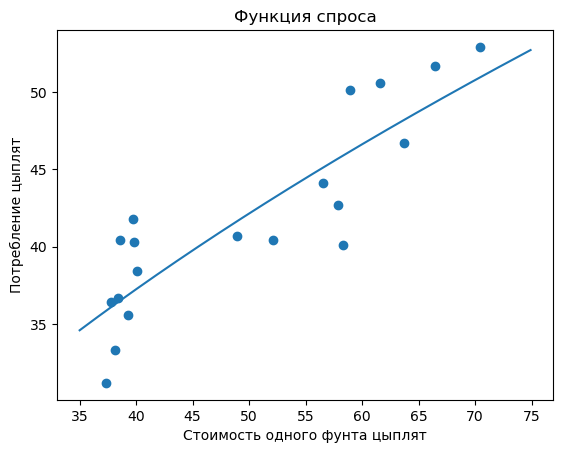

In [329]:
x =np.arange(35, 75, 0.1)
y = 4.844 * pow(x, 0.553)
plt.scatter(X2, Y)
plt.plot(x, y)
plt.title("Функция спроса")   
plt.ylabel('Потребление цыплят')   
plt.xlabel('Стоимость одного фунта цыплят') 

In [368]:
model2 = regression(np.log(Y), np.log(X1))
print(f'Функция потребления: y = {np.exp(model2.params[0]):.3f} * X2^{model2.params[1]:.3f}')

Функция потребления: y = 5.732 * X2^0.285


Text(0.5, 0, 'Средний доход на душу населения')

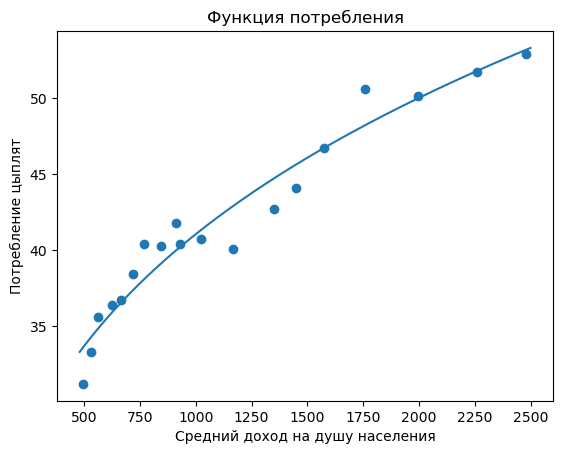

In [331]:
x =np.arange(480, 2500, 1)
y = 5.732 * pow(x, 0.285)
plt.scatter(X1, Y)
plt.plot(x, y)
plt.title("Функция потребления")   
plt.ylabel('Потребление цыплят')   
plt.xlabel('Средний доход на душу населения') 

In [370]:
model3 = regression(np.log(Y), np.log(data1[['X1', 'X2']]))
print(f'Функция спроса-потребления: y = {np.exp(model3.params[0]):.3f} * X1^{model3.params[1]:.3f} * X2^{model3.params[2]:.3f}')

Функция спроса-потребления: y = 7.527 * X1^0.416 * X2^-0.305


In [372]:
model4 = regression(np.log(Y), np.log(data1[['X2', 'X3', 'X4']]))
print(f'Функция спроса с учетом цены на товары-заменители: y = {np.exp(model4.params[0]):.3f} * X2^{model4.params[1]:.3f} * X3^{model4.params[2]:.3f} * X4^{model4.params[3]:.3f}')

Функция спроса с учетом цены на товары-заменители: y = 10.127 * X2^-0.487 * X3^0.237 * X4^0.460


In [339]:
print(f'Функция спроса: \n {model1.summary2()} Функция потребления: \n {model2.summary2()} Функция спроса-потребления: \n {model3.summary2()}Функция спроса с учетом цены на товары-заменители: \n {model4.summary2()}')
summaries

Функция спроса: 
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.722    
Dependent Variable: Y                AIC:                -41.0765 
Date:               2023-12-13 00:34 BIC:                -39.1876 
No. Observations:   19               Log-Likelihood:     22.538   
Df Model:           1                F-statistic:        47.86    
Df Residuals:       17               Prob (F-statistic): 2.49e-06 
R-squared:          0.738            Scale:              0.0061022
---------------------------------------------------------------------
           Coef.     Std.Err.      t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const      1.5777      0.3105    5.0810    0.0001    0.9226    2.2328
X2         0.5527      0.0799    6.9183    0.0000    0.3842    0.7213
------------------------------------------------------------------
Omnibus:              0.824         Durbin-Wats

C:\Users\Acer\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Acer\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Acer\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Acer\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


{'Функция спроса': <class 'statsmodels.iolib.summary2.Summary'>
 """
                  Results: Ordinary least squares
 Model:              OLS              Adj. R-squared:     0.722    
 Dependent Variable: Y                AIC:                -41.0765 
 Date:               2023-12-13 00:29 BIC:                -39.1876 
 No. Observations:   19               Log-Likelihood:     22.538   
 Df Model:           1                F-statistic:        47.86    
 Df Residuals:       17               Prob (F-statistic): 2.49e-06 
 R-squared:          0.738            Scale:              0.0061022
 ---------------------------------------------------------------------
            Coef.     Std.Err.      t       P>|t|     [0.025    0.975]
 ---------------------------------------------------------------------
 const      1.5777      0.3105    5.0810    0.0001    0.9226    2.2328
 X2         0.5527      0.0799    6.9183    0.0000    0.3842    0.7213
 -------------------------------------------------

Интерпретация и сравнение. 
Как мы видим, лучшее значение исправленного коэфициента детерминации (0.959, очень близкое к единице) имеет третья модель - функция спроса-потребления. Эта модель также имеет самую близкую к нулю среднеквадратическую ошибку и самые маленькие значения информационных критериев Акаике и Байеса. К тому же, все коэффициенты этой модели статистически значимы на взятом нами уровне значимости 0.05 и модель в целом значима.

Проинтерпретируем эту модель.
Уранение регрессии имеет вид $\hat{y} = 7.527 \cdot X_1^{0.416} \cdot X_2^{-0.305}$.
Коэффициент $b_0 = 7.527$ этой модели показывает, что, согласно этой модели, при значениях независимых переменных единица потребление цыплят (переменная y) будет равно 7.527. 
Рассмотрим коэффициент $b_1$ = 0.416: 
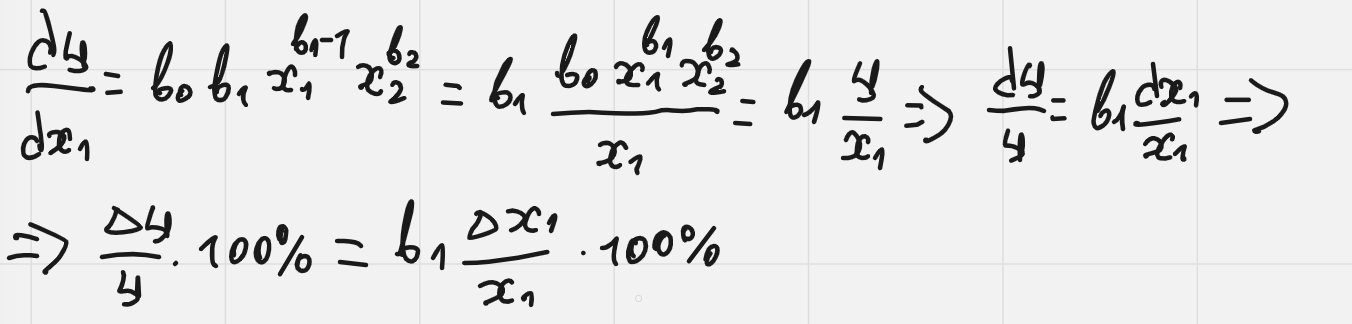
Таким образом, $b_1$ можно интерпретировать так: при увеличении среднедушевого дохода на 1% потребление цыплят растет на 0.416%.

Аналогично, коэффициент $b_2 = -0.305$ означает, что. согласно этой модели, при увеличении стоимости одного фунта цыплят на 1% потребление цыплят падает на 0.305%.

**Тест Шапиро-Уилка**

In [340]:
shapiro_whilk_tests = {
    'X1': stats.shapiro(X1),
    'X2': stats.shapiro(X2),
    'X3': stats.shapiro(X3),
    'X4': stats.shapiro(X4)
}
shapiro_whilk_tests

{'X1': ShapiroResult(statistic=0.896443247795105, pvalue=0.04197002574801445),
 'X2': ShapiroResult(statistic=0.8548540472984314, pvalue=0.008054640144109726),
 'X3': ShapiroResult(statistic=0.89530348777771, pvalue=0.04003702849149704),
 'X4': ShapiroResult(statistic=0.8776261210441589, pvalue=0.01952611841261387)}

То есть на уровне значимости 0.05 можем утверждать, что все данные выборки полученны не из нормального распределения

Применим преобразования Бокса-Кокса для всех переменных. Все значения выборки по всем переменным положительны, поэтому можем спокойно это сделать.

In [341]:
box_cox_transformed_predictors = np.empty((4, 19))
for i in range(1, 5):
    box_cox_transformed_predictors[i-1], _ = stats.boxcox(data1['X'+str(i)])
box_cox_transforms

array([[2.79550254, 2.80606791, 2.81469837, 2.83039574, 2.83951262,
        2.8497516 , 2.85890355, 2.87117967, 2.88116714, 2.88384099,
        2.89534707, 2.91121598, 2.92805082, 2.93599245, 2.94506377,
        2.9567036 , 2.9694851 , 2.98167812, 2.99052614],
       [1.192043  , 1.1932451 , 1.19496585, 1.19279966, 1.19368432,
        1.19606166, 1.19397373, 1.19565536, 1.1955187 , 1.20881768,
        1.20596691, 1.21353576, 1.21325876, 1.21226168, 1.21696835,
        1.21569754, 1.21394492, 1.21849605, 1.22056538],
       [2.52356626, 2.57822648, 2.61005177, 2.59012821, 2.58261309,
        2.61103575, 2.62631671, 2.60001369, 2.6524128 , 2.71342875,
        2.70939641, 2.79292891, 2.80789301, 2.77824792, 2.81014777,
        2.80766634, 2.80354852, 2.83177743, 2.88152105],
       [1.57471705, 1.57747681, 1.57766808, 1.58089777, 1.582304  ,
        1.5889053 , 1.5973163 , 1.59650904, 1.60190483, 1.60708568,
        1.6087279 , 1.61514524, 1.61541269, 1.61369627, 1.62285686,
        1.632

In [342]:
for i in range(4):
   print('X'+str(i+1) + ':', stats.shapiro( box_cox_transformed_predictors[i])) 

X1: ShapiroResult(statistic=0.9598411917686462, pvalue=0.569256603717804)
X2: ShapiroResult(statistic=0.8407939672470093, pvalue=0.004768925718963146)
X3: ShapiroResult(statistic=0.9084967374801636, pvalue=0.06947548687458038)
X4: ShapiroResult(statistic=0.9304439425468445, pvalue=0.17648252844810486)


Видим, что после преобразования Бокса-Кокса на уровне значимости 0.05 можно говорить о том, что преобразованные данные переменных X1, X3 и X4 взяты из нормального распределения.

**Критерий Манна-Уитни для оценки различий X3 и X4**

Применение критерия уместно, так как обе выборки не являются нормальными (из предыдущего пункта) и размер выборки меньше 30

In [343]:
mann_whitney_test = stats.mannwhitneyu(X3, X4)
print('pvalue критерия Манна-Уитни для оценки различий X3 и X4: ', mann_whitney_test.pvalue)

pvalue критерия Манна-Уитни для оценки различий X3 и X4:  0.022774865372337656


То есть на уровне значимости 0.05 имеются статистически значимые различия между распределениями цены на свинину и цены на говядину.

**Критерий Флигнера-Киллина для Х2 и Х3**

In [344]:
fligner_killin_test = stats.fligner(X2, X3)
print('pvalue критерия Флигнера-Киллина для X2 и X3: ', fligner_killin_test.pvalue)

pvalue критерия Флигнера-Киллина для X2 и X3:  4.158894013328987e-05


Это говорит нам о том, что дисперсии Х2 и Х3 значительно различается (на уровне значимости 0.05).

Используем эту информацию для проведения **t-теста Стьюдента**

In [345]:
t_test = stats.ttest_ind(X2, X3, equal_var=False)
print('pvalue теста Стьюдента для X2 и X3: ', t_test.pvalue)

pvalue теста Стьюдента для X2 и X3:  5.474644516999182e-06


Это указывает нам на статистически значимые различия в средних значениях стоимости фунта цыплят и фунта свинины, учитывая значительную разницу в дисперсиях.

# Задание 2

In [346]:
data2 = pd.read_csv('task_2.csv', delimiter = ';')

In [347]:
X = data2[['staff', 'adverts', 'projects']]
y = data2['profitability']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2)

In [348]:
for degree in range(0, 15):
    poly_features = PolynomialFeatures(degree + 1)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    model = LinearRegression().fit(X_train_poly, y_train)
    y_pred_test = model.predict(X_test_poly) 
    y_pred_train = model.predict(X_train_poly)
    R2 = model.score(X_test_poly, y_test)
    MSE_test = mean_squared_error(y_test, y_pred_test)
    MSE_train = mean_squared_error(y_train, y_pred_train)
    print(f'Степень = {degree+1}, R^2 = {R2}, MSE_test = {MSE_test}, MSE_train = {MSE_train}')

Степень = 1, R^2 = 0.6210759506480268, MSE_test = 74.69617664811848, MSE_train = 61.863651729292314
Степень = 2, R^2 = 0.8141348838090714, MSE_test = 36.63904039731377, MSE_train = 22.82875193284965
Степень = 3, R^2 = 0.6186658640431503, MSE_test = 75.1712698893181, MSE_train = 7.492356438939254
Степень = 4, R^2 = -13.282227741199769, MSE_test = 2815.4132948536235, MSE_train = 23.12232854885833
Степень = 5, R^2 = -20.675383334051553, MSE_test = 4272.804181220193, MSE_train = 4.808330928029946e-17
Степень = 6, R^2 = -8.023831401670185, MSE_test = 1778.8411835425366, MSE_train = 8.972027186317996e-20
Степень = 7, R^2 = -6.0687987335270925, MSE_test = 1393.4513784293438, MSE_train = 5.283121669830974e-20
Степень = 8, R^2 = -5.381808289097154, MSE_test = 1258.0269848590049, MSE_train = 8.108904671420744e-20
Степень = 9, R^2 = -15.56911386599577, MSE_test = 3266.220389953626, MSE_train = 1.2849698420516917e-19
Степень = 10, R^2 = -83.63523467729729, MSE_test = 16683.893384233517, MSE_train 

Видим, что при степени полинома 2 модель имеет наилучшие показатели коэффициента детерминации и среднеквадратического отклонения.

Значения $R^2$ на падают сильно при увеличении степени полинома выше 2.
Также MSE на тестовых данных быстро увеличивается с увеличением степени полинома, а вот на тренировочных стремится к 0, что говорит о переобучение модели при более высоких степенях, то есть модель отлично работает на тренировочных данных, но на каких-то других становится очень некачественной.

С точки зрения выбора оптимальной степени полинома, полином 2-й степени представляется наиболее подходящим, так как он обеспечивает хороший баланс между точностью и сложностью модели, избегая переобучения.

# Задание 3

In [351]:
data3 = pd.read_csv('task_3.csv', delimiter = ';')
data3.columns = data3.iloc[1,:]
data3 = data3.iloc[2:,1:].astype(float)
data3.describe()

1,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.095455,68.378932,177.743205,238.637091,19.351727,26.943773,187.548159,13.066136,4.760273,1218.938477,61.122727,35.729114,8.235318,62.521591
std,0.294176,12.064899,623.124934,865.264831,31.040787,39.419942,329.457802,6.786782,6.874771,921.505332,224.585446,14.845077,8.196771,31.806726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,61.420000,14.690000,25.785000,4.875000,7.827500,46.505000,8.682500,0.650000,632.545000,1.000000,25.110000,3.360000,40.205000
50%,0.000000,68.750000,43.285000,70.655000,10.560000,16.345000,91.610000,12.215000,2.715000,974.815000,8.000000,34.530000,5.320000,71.920000
75%,0.000000,75.315000,112.897500,167.460000,21.280000,30.552500,186.202500,16.922500,6.172500,1462.902500,29.000000,45.270000,10.037500,89.795000
max,1.000000,98.000000,7351.080000,11675.680000,279.070000,348.530000,3185.780000,48.070000,54.770000,6145.710000,3096.000000,82.720000,55.680000,100.000000


Видим большую разницу средних значений и дисперсий переменных. Признаки с разными масштабами могут исказить результаты метода главных компонент, поэтому стандартизуем наши данные.

In [352]:
data3_standardized = StandardScaler().fit_transform(data3)

Найдем минимальное число компонент, необходимое для объяснения 0.75 исходной информации. Для этого в цикле построим модели с числом главных компонент от двух до того количества, которое будет объяснять более 75% дисперсии данной выборки.

In [353]:
i = 1
information_percentage = 0
while information_percentage < 0.75:
    pca = PCA(n_components=i)
    pca_model=pca.fit(data3_standardized)
    information_percentage = np.sum(pca_model.explained_variance_ratio_)
    i+=1
print('Доли дисперсии исходного набора данных, объясняемые главными компонентами:\n', pca_model.explained_variance_ratio_)
print('Суммарная доля дисперсии исходного набора данных, объясняемая главными компонентами:', information_percentage, '(>0.75)')
print('Минимальное число компонент, необходимое для объяснения 0.75 исходной информации:', i-1)

Доли дисперсии исходного набора данных, объясняемые главными компонентами:
 [0.41343993 0.14185423 0.09350968 0.0663221  0.06416057]
Суммарная доля дисперсии исходного набора данных, объясняемая главными компонентами: 0.7792865030081405 (>0.75)
Минимальное число компонент, необходимое для объяснения 0.75 исходной информации: 5


In [373]:
for i in range(len(pca_model.components_)):
    print(f'Компонент {i+1} = ', end='')
    for j in range(len(pca_model.components_[i])):
        print(f'{pca_model.components_[i, j]:.2f}*x{j+1} ', end='')
        if j == len(pca_model.components_[i]) - 1:
            print('\n')
        else:
            print('+ ', end='')

Компонент 1 = 0.29*x1 + 0.13*x2 + 0.34*x3 + 0.33*x4 + 0.38*x5 + 0.38*x6 + 0.32*x7 + 0.20*x8 + 0.16*x9 + 0.18*x10 + 0.28*x11 + 0.10*x12 + 0.31*x13 + 0.03*x14 

Компонент 2 = -0.02*x1 + -0.29*x2 + 0.22*x3 + 0.21*x4 + 0.11*x5 + 0.08*x6 + -0.14*x7 + -0.16*x8 + 0.16*x9 + -0.50*x10 + 0.09*x11 + -0.59*x12 + 0.04*x13 + -0.35*x14 

Компонент 3 = 0.01*x1 + -0.55*x2 + -0.07*x3 + -0.08*x4 + -0.07*x5 + -0.04*x6 + 0.19*x7 + 0.36*x8 + 0.35*x9 + -0.21*x10 + -0.19*x11 + -0.01*x12 + 0.17*x13 + 0.53*x14 

Компонент 4 = -0.39*x1 + 0.09*x2 + 0.26*x3 + 0.20*x4 + 0.07*x5 + 0.00*x6 + -0.38*x7 + 0.07*x8 + 0.51*x9 + 0.02*x10 + 0.19*x11 + 0.25*x12 + -0.44*x13 + 0.15*x14 

Компонент 5 = -0.28*x1 + -0.26*x2 + 0.31*x3 + 0.34*x4 + 0.06*x5 + 0.07*x6 + 0.11*x7 + -0.51*x8 + -0.40*x9 + 0.09*x10 + -0.18*x11 + 0.06*x12 + -0.02*x13 + 0.38*x14 



# Задание 4

In [355]:
data4 = pd.read_csv('task_4.csv', delimiter = ';')

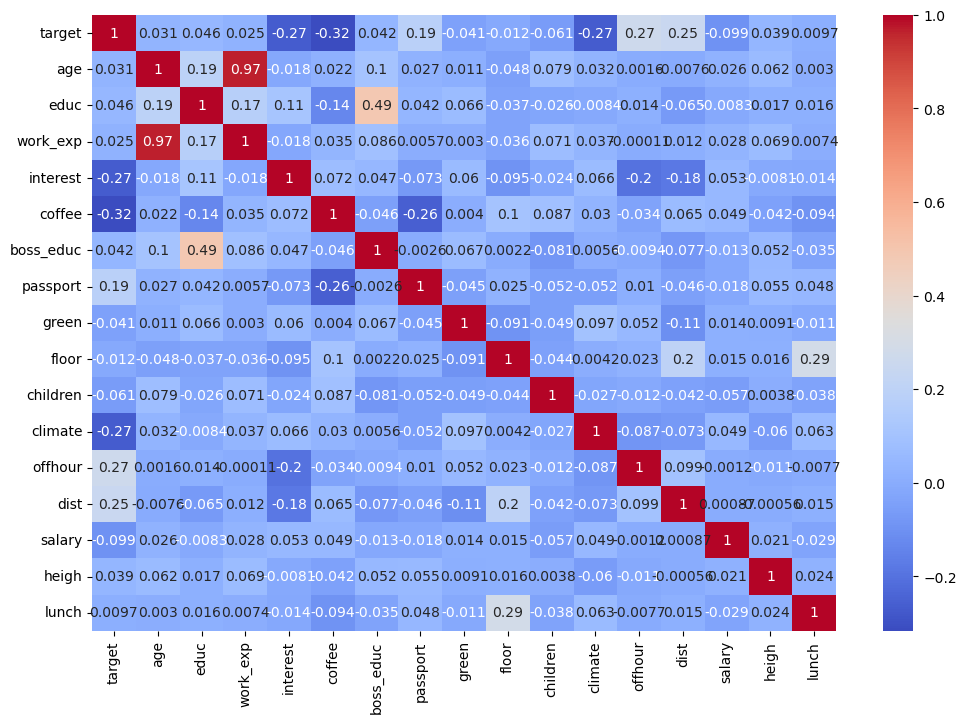

In [356]:
import seaborn as sns

corr_matrix = data4.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Сразу бросается в глаза коэффициент корреляции 0.97 для возраста и времени работы, из чего можем сделать вывод, что в модель регрессии следует включить только один из них. Также видим, что сильной связи между остальными переменными-предикторами нет, кроме, быть может зависимости между образованием сотрудника и начальника, что объяснимо: на более наукоемкой работе и сотрудники и руководство должны быть более образованы. Конечно, стоит оговориться, что все эти коэффициенты следует проверить на значимость, однако мы не будем этого делать.

Чтобы убедиться в полученных выводах, расчитаем vif для всех независимых переменных.

In [357]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant  

X = add_constant(data4)  
ds = pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds)

const        575.949968
target         1.463949
age           15.660924
educ           1.404272
work_exp      15.529182
interest       1.145704
coffee         1.250081
boss_educ      1.344711
passport       1.108408
green          1.043337
floor          1.186014
children       1.040376
climate        1.104560
offhour        1.111448
dist           1.178294
salary         1.020891
heigh          1.018338
lunch          1.125075
dtype: float64


Можем убедиться, что из age и work_exp стоит оставить только одну (пусть это будет work_exp).

Теперь попробуем исключать переменные исходя из общей логики. Очевидно, что этаж работы и рост сотрудника не будут хоть сколько нибудь значимо влиять на то, уволится сотрудник или нет. Эти переменные мы точно исключим из модели логистической регрессии. Также под вопром о влиянии на вероятность увольнения работника стоят такие переменные средняя цена бизнес ланча, уровень образования начальника, среднее количество чашек кофе за рабочий день и степень озеленения офиса, так как кажется, что они не оказывают существенного влияния на увольнение. Мы попробуем две модели, с включением этих переменных, и без них.

In [358]:
X1 = data4[['educ', 'work_exp', 'interest', 'coffee', 'boss_educ', 'passport', 
           'green', 'children', 'climate', 'offhour', 'dist', 'salary', 'lunch']]
X2 = data4[['educ', 'work_exp', 'interest', 'passport', 
           'children', 'climate', 'offhour', 'dist', 'salary']]
y = data4['target']

Построим две модели.

In [359]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=0)
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [360]:
print(model1.coef_, '\n', model2.coef_)

[[ 0.01225218  0.01058581 -0.16389193 -0.89429886  0.08684852  0.63181989
  -0.00271018 -0.1406198  -0.44666505  1.02739818  0.12883135 -0.40762109
  -0.00105588]] 
 [[ 0.11951282  0.0048718  -0.1603513   0.91265406 -0.17090269 -0.42810475
   0.99244028  0.11259102 -0.45931066]]


Теперь выведем матрицу ошибок. Элементы в ней располагаются следующим образом: $$\begin{bmatrix} TN & FP  \\ FN & TP  \end{bmatrix}$$, где TN - True Negative, FP - False Positiveи т.п. Интерпретация элементов приведена в выводе ячейки ниже.

In [361]:
conf_matrix1 = confusion_matrix(y_test1, y_pred1)
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
print('Модель 1 (расширенная)')
print('TN:', conf_matrix[0,0], 'предсказаний, что сотрудник не уволится, и это правда')
print('FP:', conf_matrix[0,1], 'предсказаний, что сотрудник уволится, но это неверно')
print('FN:', conf_matrix[1,0], 'предсказаний, что сотрудник не уволится, но это неверно')
print('TP:', conf_matrix[1,1], 'предсказаний, что сотрудник уволится, и это правда')
print('Модель 2')
print('TN:', conf_matrix[0,0], 'предсказаний, что сотрудник не уволится, и это правда')
print('FP:', conf_matrix[0,1], 'предсказаний, что сотрудник уволится, но это неверно')
print('FN:', conf_matrix[1,0], 'предсказаний, что сотрудник не уволится, но это неверно')
print('TP:', conf_matrix[1,1], 'предсказаний, что сотрудник уволится, и это правда')

Модель 1 (расширенная)
TN: 125 предсказаний, что сотрудник не уволится, и это правда
FP: 15 предсказаний, что сотрудник уволится, но это неверно
FN: 30 предсказаний, что сотрудник не уволится, но это неверно
TP: 27 предсказаний, что сотрудник уволится, и это правда
Модель 2
TN: 125 предсказаний, что сотрудник не уволится, и это правда
FP: 15 предсказаний, что сотрудник уволится, но это неверно
FN: 30 предсказаний, что сотрудник не уволится, но это неверно
TP: 27 предсказаний, что сотрудник уволится, и это правда


Видим, что результаты предсказаний обеих моделей одинаковые, что говорит о незначимости переменных, которые мы исключили во второй модели по сравнению с первой. Однако, различия в моделях все равно есть, их мы можем увидеть при рассмотрении других метрик качества модели.

In [362]:
report1 = classification_report(y_test1, y_pred1)
report2 = classification_report(y_test2, y_pred2)
print('Модель 1 (расширенная)\n', report1)
print('Модель 2\n', report2)

Модель 1 (расширенная)
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       140
           1       0.64      0.47      0.55        57

    accuracy                           0.77       197
   macro avg       0.72      0.68      0.70       197
weighted avg       0.76      0.77      0.76       197

Модель 2
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       140
           1       0.65      0.49      0.56        57

    accuracy                           0.78       197
   macro avg       0.73      0.69      0.71       197
weighted avg       0.77      0.78      0.77       197



Здесь нас интересуют: 

precision - вероятность правильности модели в определении соответствующего класса (1 или 0, уволится или не уволится)

recall - доля правильно идентифицированных сотрудников в соответствующем классе 

Во первых, видим, что обе модели с большой вероятностью предсказывают неувольнение сотрудника (81% предсказаний правильны и 89% не уволящихся сотрудников определены верно). Что касается предсказаний увольнения, модель с меньшим количесством переменных делает это чуть лучше (на 0.01 вероятнее и на 2% больше сотрудников, которые уволились, определены верно). На нашей тестовой выборке мы этого не заметили из-за малого размера, однако при больших значениях это может сыграть какую-то роль.


**Построим ROC-кривую**, для наглядного представления чувствительности (вероятности того, что модель предсказывает положительный результат для наблюдения, когда результат действительно положительный) и специфичности (вероятности того, что модель предсказывает отрицательный результат для наблюдения, когда результат действительно отрицательный).

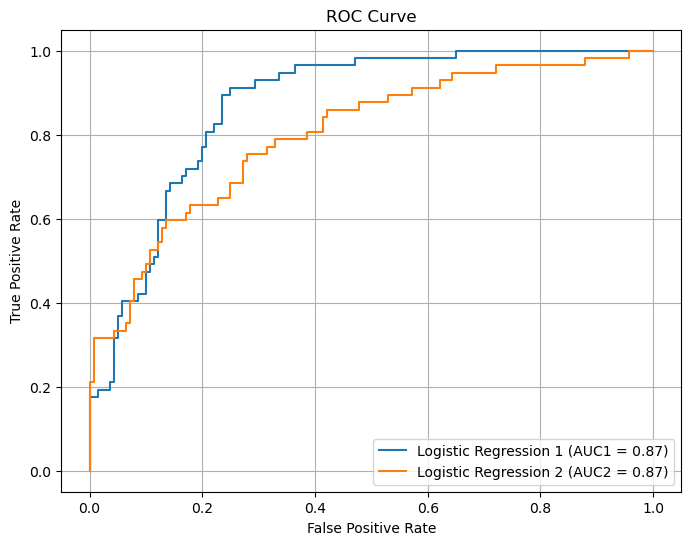

In [306]:
y_pred_prob1 = model1.predict_proba(X_test1)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test1, y_pred_prob1)
roc_auc1 = auc(fpr1, tpr1)

y_pred_prob2 = model2.predict_proba(X_test2)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test2, y_pred_prob2)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'Logistic Regression 1 (AUC1 = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'Logistic Regression 2 (AUC2 = {roc_auc1:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Логистическая модель тем лучше, чем больше она охватывает левый верхний угол графика. Для оценки этого используется значение AUC - площадь под графиком. Как мы видим, хоть кривые и выглядят по разному, площадь под графиком у них одинакова, Вообще, 0.87 очень хорошее значение AUC для модели, которое подтверждает наши предыдущие выводы о том, что эта модель применима.